<a href="https://colab.research.google.com/github/DmytroV1991/Python-for-Data-Analytics/blob/main/Python_Modul_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Mate - Diffrent file types/Modul task Python

# Reading the file
products = pd.read_csv("products.csv")
events = pd.read_csv("events.csv")
countries = pd.read_csv("countries.csv")
products.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate - Diffrent file types/Modul task Python


,id,item_type
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics
10,8969,Snacks
11,3127,Personal Care


In [ ]:
# change id in products into Product ID

products.rename(columns={'id': 'Product ID'}, inplace=True)
products.head()

,Product ID,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
events.head(2000)


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79
...,...,...,...,...,...,...,...,...,...,...
1325,994504153,1/10/2017,1/13/2017,M,SWE,4594,Online,4734.0,9.33,6.92
1326,994978797,12/5/2014,1/2/2015,H,ITA,1270,Offline,5192.0,47.45,31.79
1327,996754205,9/20/2010,9/22/2010,L,RUS,7331,Offline,574.0,255.28,159.42
1328,998043382,6/15/2010,7/3/2010,H,MLT,8293,Online,2070.0,437.20,263.33


In [ ]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# alpha-3 in countries into Country Code

countries.rename(columns={'alpha-3': 'Country Code'}, inplace=True)
countries.head(500)

,name,alpha-2,Country Code,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa


In [ ]:
# delete alpha-2 column from countries
# delete Order Priority from events


if 'alpha-2' in countries.columns:

    countries.drop("alpha-2", axis=1, inplace=True)
else:
    print("Column 'alpha-2' not found in the DataFrame.")

if 'Order Priority' in events.columns:
    events.drop("Order Priority", axis=1, inplace=True)
else:
    print("Column 'Order Priority' not found in the DataFrame.")



In [ ]:
# check if Units Sold and Unit Price exist in events
# calculate revenue = Units Sold*Unit Price
# Check if 'Units Sold' and 'Unit Price' columns exist in the DataFrame
# calculate profit = (unit price - unit sold)*units sold

if 'Units Sold' in events.columns and 'Unit Price' in events.columns:
    events['Revenue'] = events['Units Sold'] * events['Unit Price']
else:
    print("Columns 'Units Sold' and 'Unit Price' not found in the DataFrame.")

if 'Units Sold' in events.columns and 'Unit Price' in events.columns:
    events['Profit'] = (events['Unit Price'] - events['Unit Cost']) * events['Units Sold']

    print(events.head())

    Order ID Order Date   Ship Date Country Code  Product ID Sales Channel  \
0  100640618  10/8/2014  10/18/2014          NOR        2103        Online   
1  100983083  8/11/2016   8/11/2016          SRB        2103       Offline   
2  101025998  7/18/2014   8/11/2014          NaN        7940        Online   
3  102230632  5/13/2017   6/13/2017          MNE        2455        Online   
4  103435266  8/11/2012   9/18/2012          SRB        1270       Offline   

   Units Sold  Unit Price  Unit Cost     Revenue     Profit  
0       650.0      205.70     117.11   133705.00   57583.50  
1      1993.0      205.70     117.11   409960.10  176559.87  
2      4693.0      668.27     502.54  3136191.11  777770.89  
3      1171.0      109.28      35.84   127966.88   85998.24  
4      7648.0       47.45      31.79   362897.60  119767.68  


In [ ]:
# Check for missing values ​​in each table

is_null_dict = {name: df.isnull().sum() for name, df in zip(['products', 'events', 'countries'], [products, events, countries])}

print(pd.DataFrame(is_null_dict))

               products  events  countries
Country Code        NaN    82.0        0.0
Order Date          NaN     0.0        NaN
Order ID            NaN     0.0        NaN
Product ID          0.0     0.0        NaN
Profit              NaN     2.0        NaN
Revenue             NaN     2.0        NaN
Sales Channel       NaN     0.0        NaN
Ship Date           NaN     0.0        NaN
Unit Cost           NaN     0.0        NaN
Unit Price          NaN     0.0        NaN
Units Sold          NaN     2.0        NaN
item_type           0.0     NaN        NaN
name                NaN     NaN        0.0
region              NaN     NaN        1.0
sub-region          NaN     NaN        1.0


In [ ]:
# Fill in or fill in the missing values, justifying your opinion.


dropna_dict = {name: df.isnull().sum() for name, df in zip(['products', 'events', 'countries'], [products, events, countries])}

print(pd.DataFrame(dropna_dict))

               products  events  countries
Country Code        NaN    82.0        0.0
Order Date          NaN     0.0        NaN
Order ID            NaN     0.0        NaN
Product ID          0.0     0.0        NaN
Profit              NaN     2.0        NaN
Revenue             NaN     2.0        NaN
Sales Channel       NaN     0.0        NaN
Ship Date           NaN     0.0        NaN
Unit Cost           NaN     0.0        NaN
Unit Price          NaN     0.0        NaN
Units Sold          NaN     2.0        NaN
item_type           0.0     NaN        NaN
name                NaN     NaN        0.0
region              NaN     NaN        1.0
sub-region          NaN     NaN        1.0


I am deleting the missing data because there is no way to fill it in.

In [ ]:
dtypes_dict = {name: df.dtypes for name, df in zip(['products', 'events', 'countries'], [products, events, countries])}


print(pd.DataFrame(dtypes_dict))

              products   events countries
Country Code       NaN   object    object
Order Date         NaN   object       NaN
Order ID           NaN    int64       NaN
Product ID       int64    int64       NaN
Profit             NaN  float64       NaN
Revenue            NaN  float64       NaN
Sales Channel      NaN   object       NaN
Ship Date          NaN   object       NaN
Unit Cost          NaN  float64       NaN
Unit Price         NaN  float64       NaN
Units Sold         NaN  float64       NaN
item_type       object      NaN       NaN
name               NaN      NaN    object
region             NaN      NaN    object
sub-region         NaN      NaN    object


In [ ]:
# presence of duplicates.

duplicated_dict = {name: df.duplicated().sum() for name, df in zip(['products', 'events', 'countries'], [products, events, countries])}

duplicated_df = pd.DataFrame(duplicated_dict, index=[0])

print(duplicated_df)

   products  events  countries
0         0       0          0


In [ ]:
# Join the two tables into one dataframe.

merged_df = pd.merge(events, products, on='Product ID', how="inner")

print(merged_df.head(2000))



       Order ID Order Date   Ship Date Country Code  Product ID Sales Channel  \
0     100640618  10/8/2014  10/18/2014          NOR        2103        Online   
1     100983083  8/11/2016   8/11/2016          SRB        2103       Offline   
2     101025998  7/18/2014   8/11/2014          NaN        7940        Online   
3     102230632  5/13/2017   6/13/2017          MNE        2455        Online   
4     103435266  8/11/2012   9/18/2012          SRB        1270       Offline   
...         ...        ...         ...          ...         ...           ...   
1325  994504153  1/10/2017   1/13/2017          SWE        4594        Online   
1326  994978797  12/5/2014    1/2/2015          ITA        1270       Offline   
1327  996754205  9/20/2010   9/22/2010          RUS        7331       Offline   
1328  998043382  6/15/2010    7/3/2010          MLT        8293        Online   
1329  999879729  3/31/2012    5/6/2012          ALB        7940       Offline   

      Units Sold  Unit Pric

In [ ]:
merged_df2 = pd.merge(merged_df, countries, on='Country Code', how="inner")

print(merged_df2.head(2000))

       Order ID Order Date   Ship Date Country Code  Product ID Sales Channel  \
0     100640618  10/8/2014  10/18/2014          NOR        2103        Online   
1     100983083  8/11/2016   8/11/2016          SRB        2103       Offline   
2     102230632  5/13/2017   6/13/2017          MNE        2455        Online   
3     103435266  8/11/2012   9/18/2012          SRB        1270       Offline   
4     103450715  3/15/2015   4/18/2015          SVK        8681        Online   
...         ...        ...         ...          ...         ...           ...   
1243  994504153  1/10/2017   1/13/2017          SWE        4594        Online   
1244  994978797  12/5/2014    1/2/2015          ITA        1270       Offline   
1245  996754205  9/20/2010   9/22/2010          RUS        7331       Offline   
1246  998043382  6/15/2010    7/3/2010          MLT        8293        Online   
1247  999879729  3/31/2012    5/6/2012          ALB        7940       Offline   

      Units Sold  Unit Pric

In [ ]:
# online into Online

merged_df2['Sales Channel'] = merged_df2['Sales Channel'].replace('online', 'Online')
merged_df2['Sales Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [ ]:
# total orders amount

total_orders = merged_df2['Order ID'].nunique()
print("Total orders:", total_orders)

Total orders: 1248


In [ ]:
# total number of countries covered (name)

total_countries = merged_df2['name'].nunique()
print("Total countries covered:", total_countries)


Total countries covered: 45


In [ ]:
# Total number of orders Order id

total_orders = merged_df2['Order ID'].nunique()
print("Total orders:", total_orders)


Total orders: 1248


In [ ]:
# Average order check

average_order_check = merged_df2['Revenue'].mean()
print("Average order check:", average_order_check)

Average order check: 1283293.548362761


In [ ]:
# total profit

total_profit = merged_df2['Profit'].sum()
print("Total profit:", total_profit)

Total profit: 473709035.05999994


In [ ]:
# total revenue

total_revenue = merged_df2['Revenue'].sum()
print("Total revenue:", total_revenue)

Total revenue: 1598983761.2600002


In [ ]:
# total cocts

total_costs = merged_df2['Unit Cost'].sum()
print("Total costs:", total_costs)

Total costs: 232563.73


In [ ]:
# profitability by categories

profitability_by_category = merged_df2.groupby('item_type')['Profit'].sum() / merged_df2.groupby('item_type')['Revenue'].sum()

print(profitability_by_category)

item_type
Baby Food          0.375509
Beverages          0.330032
Cereal             0.430676
Clothes            0.672035
Cosmetics          0.397690
Fruits             0.258307
Household          0.247999
Meat               0.135580
Office Supplies    0.193870
Personal Care      0.306619
Snacks             0.361384
Vegetables         0.409775
dtype: float64


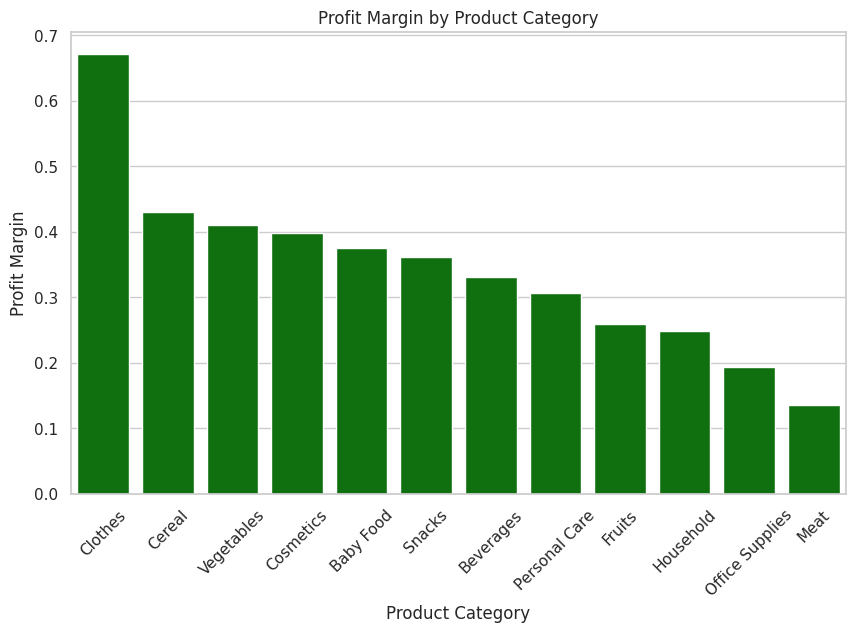

In [ ]:
# Profit Margin between revenue and profit for each category ascending

profit_margin_by_category = profitability_by_category.sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_margin_by_category.index, y=profit_margin_by_category.values, color='green')
plt.title("Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit Margin")
plt.xticks(rotation=45)
plt.show()



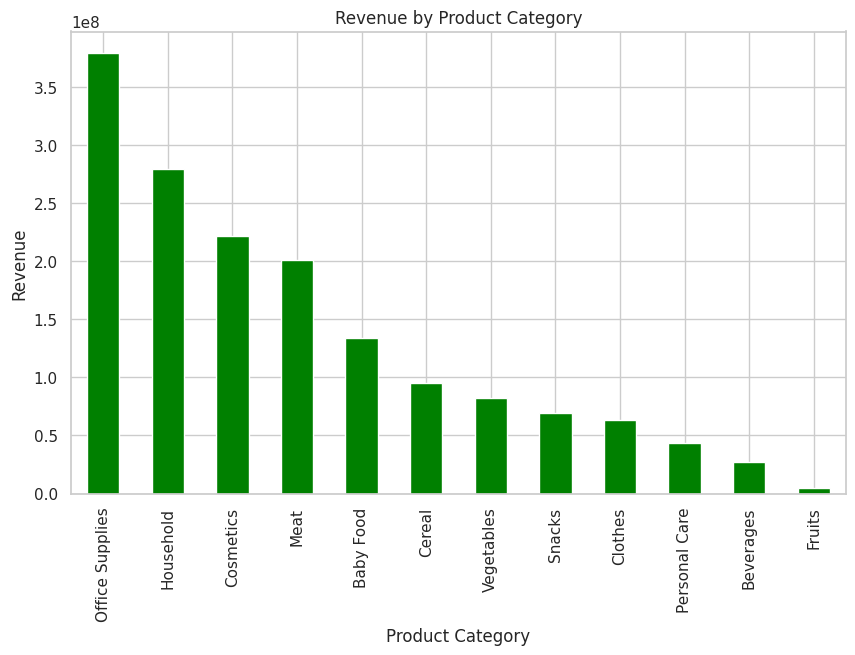

In [ ]:
# Analyze sales and income and make appropriate visualizations by: product categories;
# sort asc

revenue_by_category = merged_df2.groupby('item_type')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='green')
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.show()


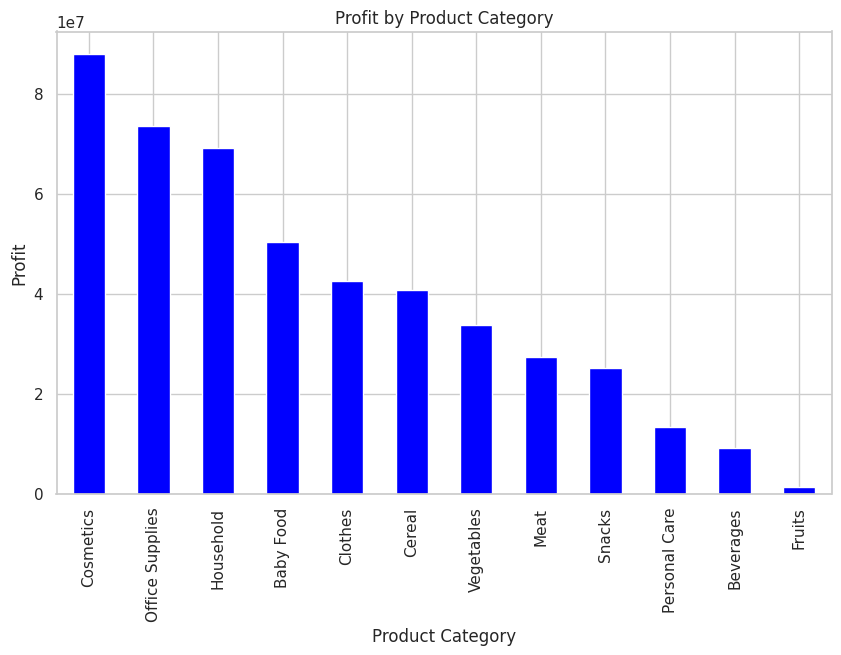

In [ ]:
# profits

profit_by_category = merged_df2.groupby('item_type')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar', color='blue')
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.show()



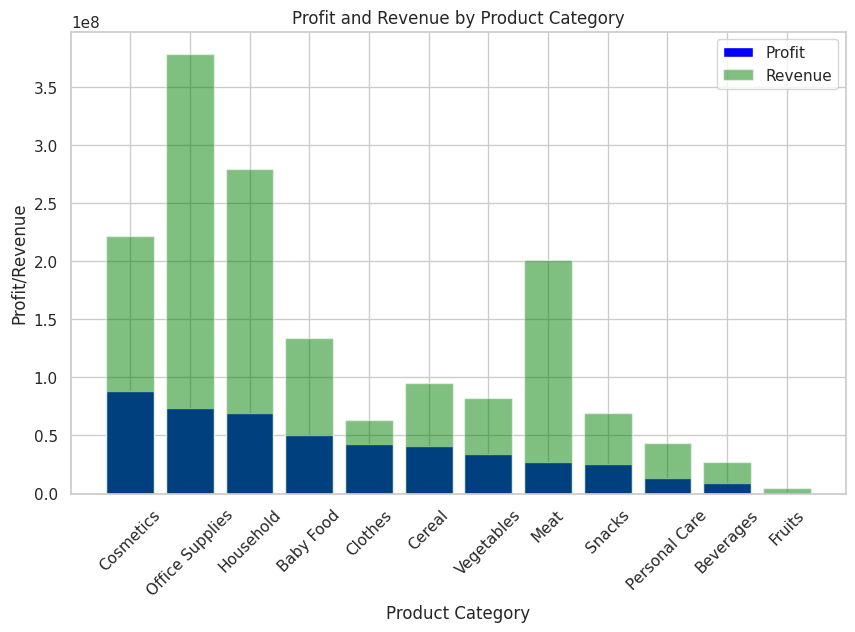

In [ ]:
# Compare profit and revenue by product category ascending

profit_by_category = merged_df2.groupby('item_type')['Profit'].sum()
revenue_by_category = merged_df2.groupby('item_type')['Revenue'].sum()

profit_by_category = profit_by_category.sort_values(ascending=False)
revenue_by_category = revenue_by_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(profit_by_category.index, profit_by_category.values, color='blue', label='Profit')
plt.bar(revenue_by_category.index, revenue_by_category.values, color='green', label='Revenue', alpha=0.5
        )
plt.title("Profit and Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit/Revenue")
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()


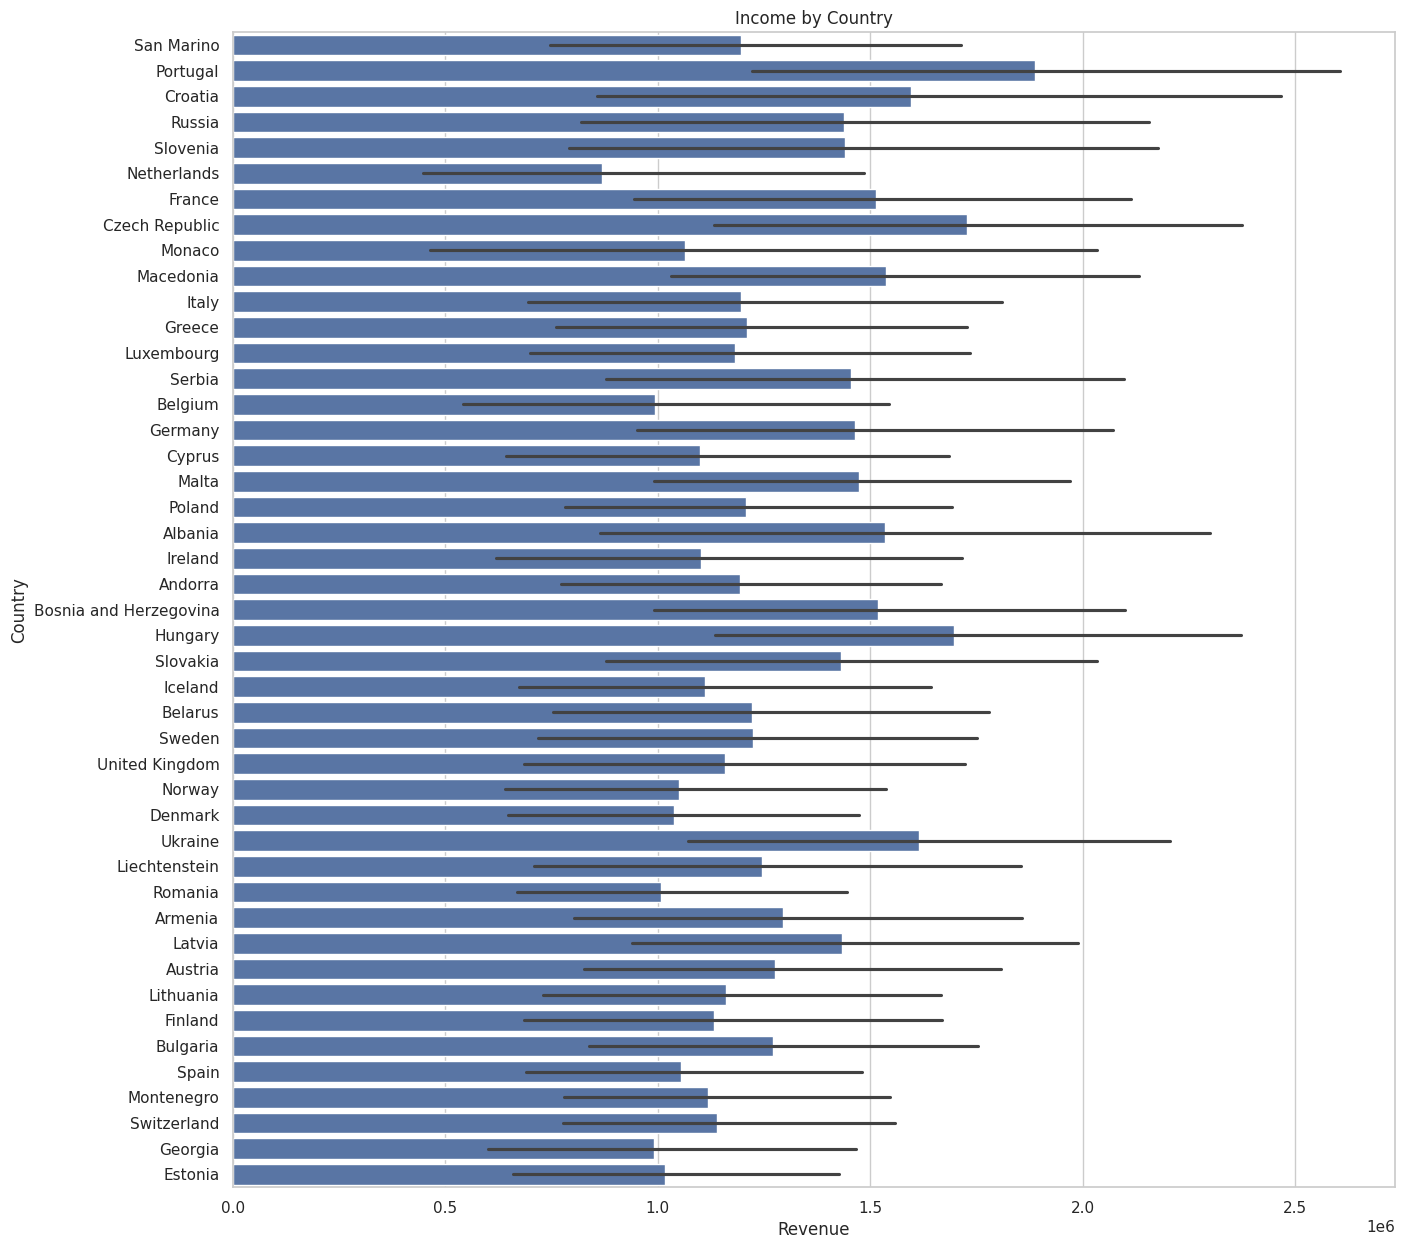

In [ ]:
# Revenue by country

merged_df2 = merged_df2.sort_values(by='Revenue', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.barplot(x='Revenue', y='name', data=merged_df2)
plt.title('Income by Country')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()



In [ ]:
# revenue by region in percent

region_revenue = merged_df2.groupby('region')['Revenue'].sum() / merged_df2['Revenue'].sum() * 100
region_revenue


,Revenue
region,
Asia,5.836888
Europe,94.163112


In [ ]:
# Sales Channel in percentage

sales_channel_in_percentage = merged_df2.groupby('Sales Channel')['Revenue'].sum() / merged_df2['Revenue'].sum() * 100
sales_channel_in_percentage






,Revenue
Sales Channel,
Offline,50.65908
Online,49.34092


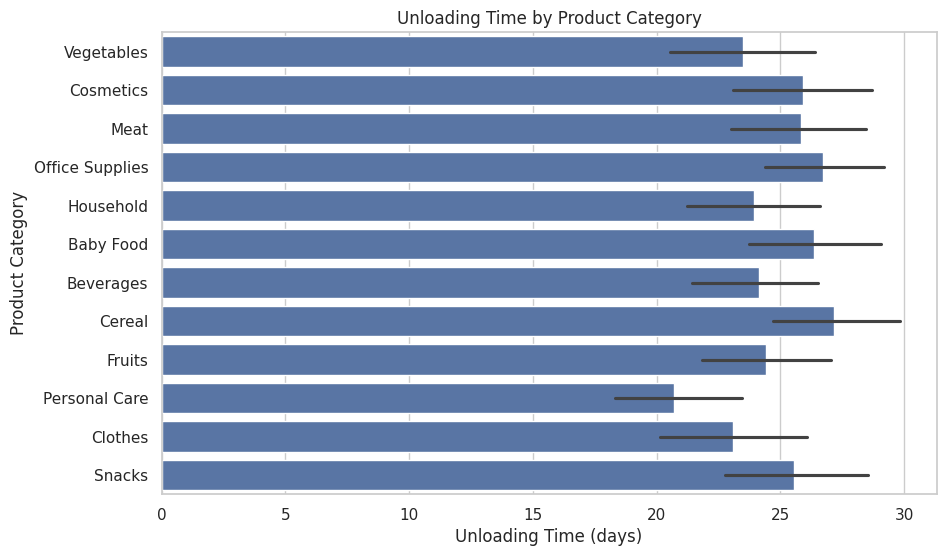

In [ ]:
 # Unloading the product = Ship Date - Order Date in days


concated_df['Ship Date'] = pd.to_datetime(concated_df['Ship Date'])
concated_df['Order Date'] = pd.to_datetime(concated_df['Order Date'])

concated_df['Unloading Time'] = (concated_df['Ship Date'] - concated_df['Order Date']).dt.days

# print(concated_df[['Ship Date', 'Order Date', 'Unloading Time']])

concated_df = concated_df.sort_values(by='Unloading Time', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Unloading Time', y='item_type', data=concated_df)
plt.title('Unloading Time by Product Category')
plt.xlabel('Unloading Time (days)')
plt.ylabel('Product Category')
plt.show()




Income does not depend on the speed of shipment.


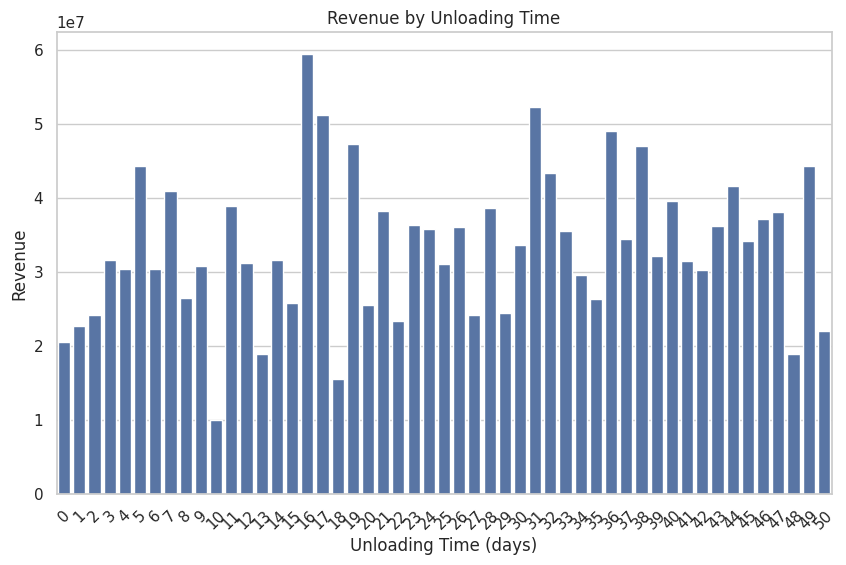

In [ ]:
# Depending Revenue by loading time

revenue_by_loading_time = concated_df.groupby('Unloading Time')['Revenue'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Unloading Time', y='Revenue', data=revenue_by_loading_time)
plt.title('Revenue by Unloading Time')
plt.xlabel('Unloading Time (days)')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


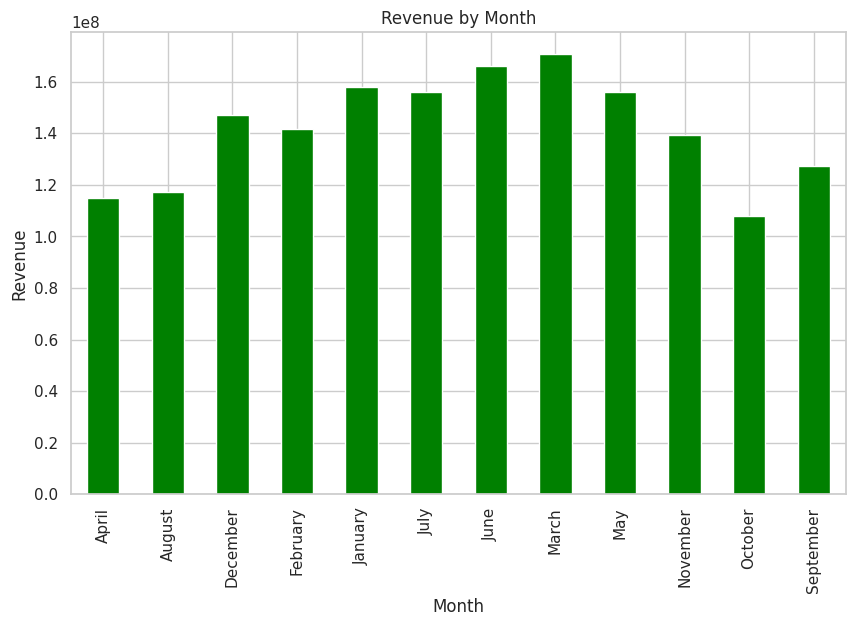

In [ ]:
# Revenue by month name

concated_df['Order Date'] = pd.to_datetime(concated_df['Order Date'])
concated_df['Month Name'] = concated_df['Order Date'].dt.month_name()

revenue_by_month = concated_df.groupby('Month Name')['Revenue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='bar', color='green')
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


December, November and June are months with higest revenue.

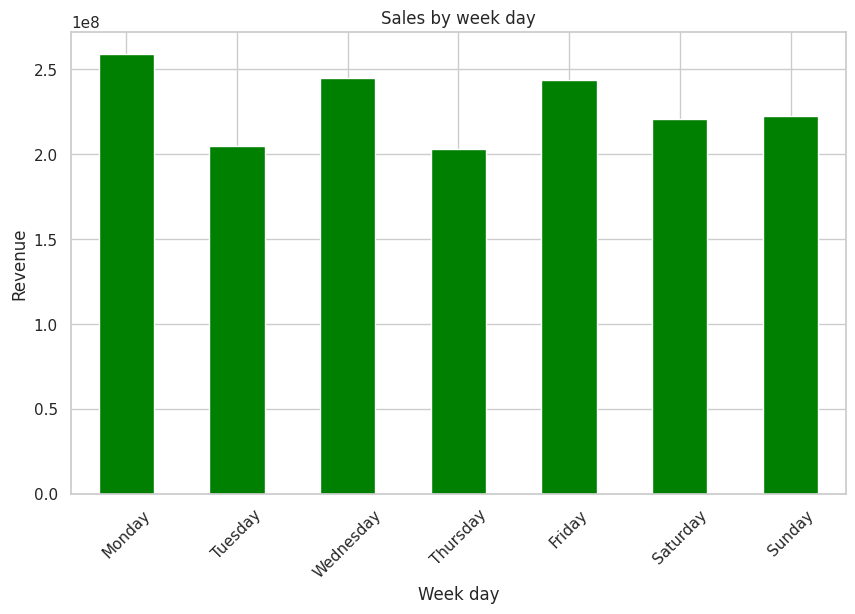

In [ ]:
# Analyze product sales by day of the week and by categories

sales_by_day = merged_df2.groupby(merged_df2['Order Date'].dt.day_name())["Revenue"].sum()
sales_by_day = sales_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='green')
plt.title("Sales by week day")
plt.xlabel("Week day")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


Monday, Wednesday and Friday are days with higest revunue.

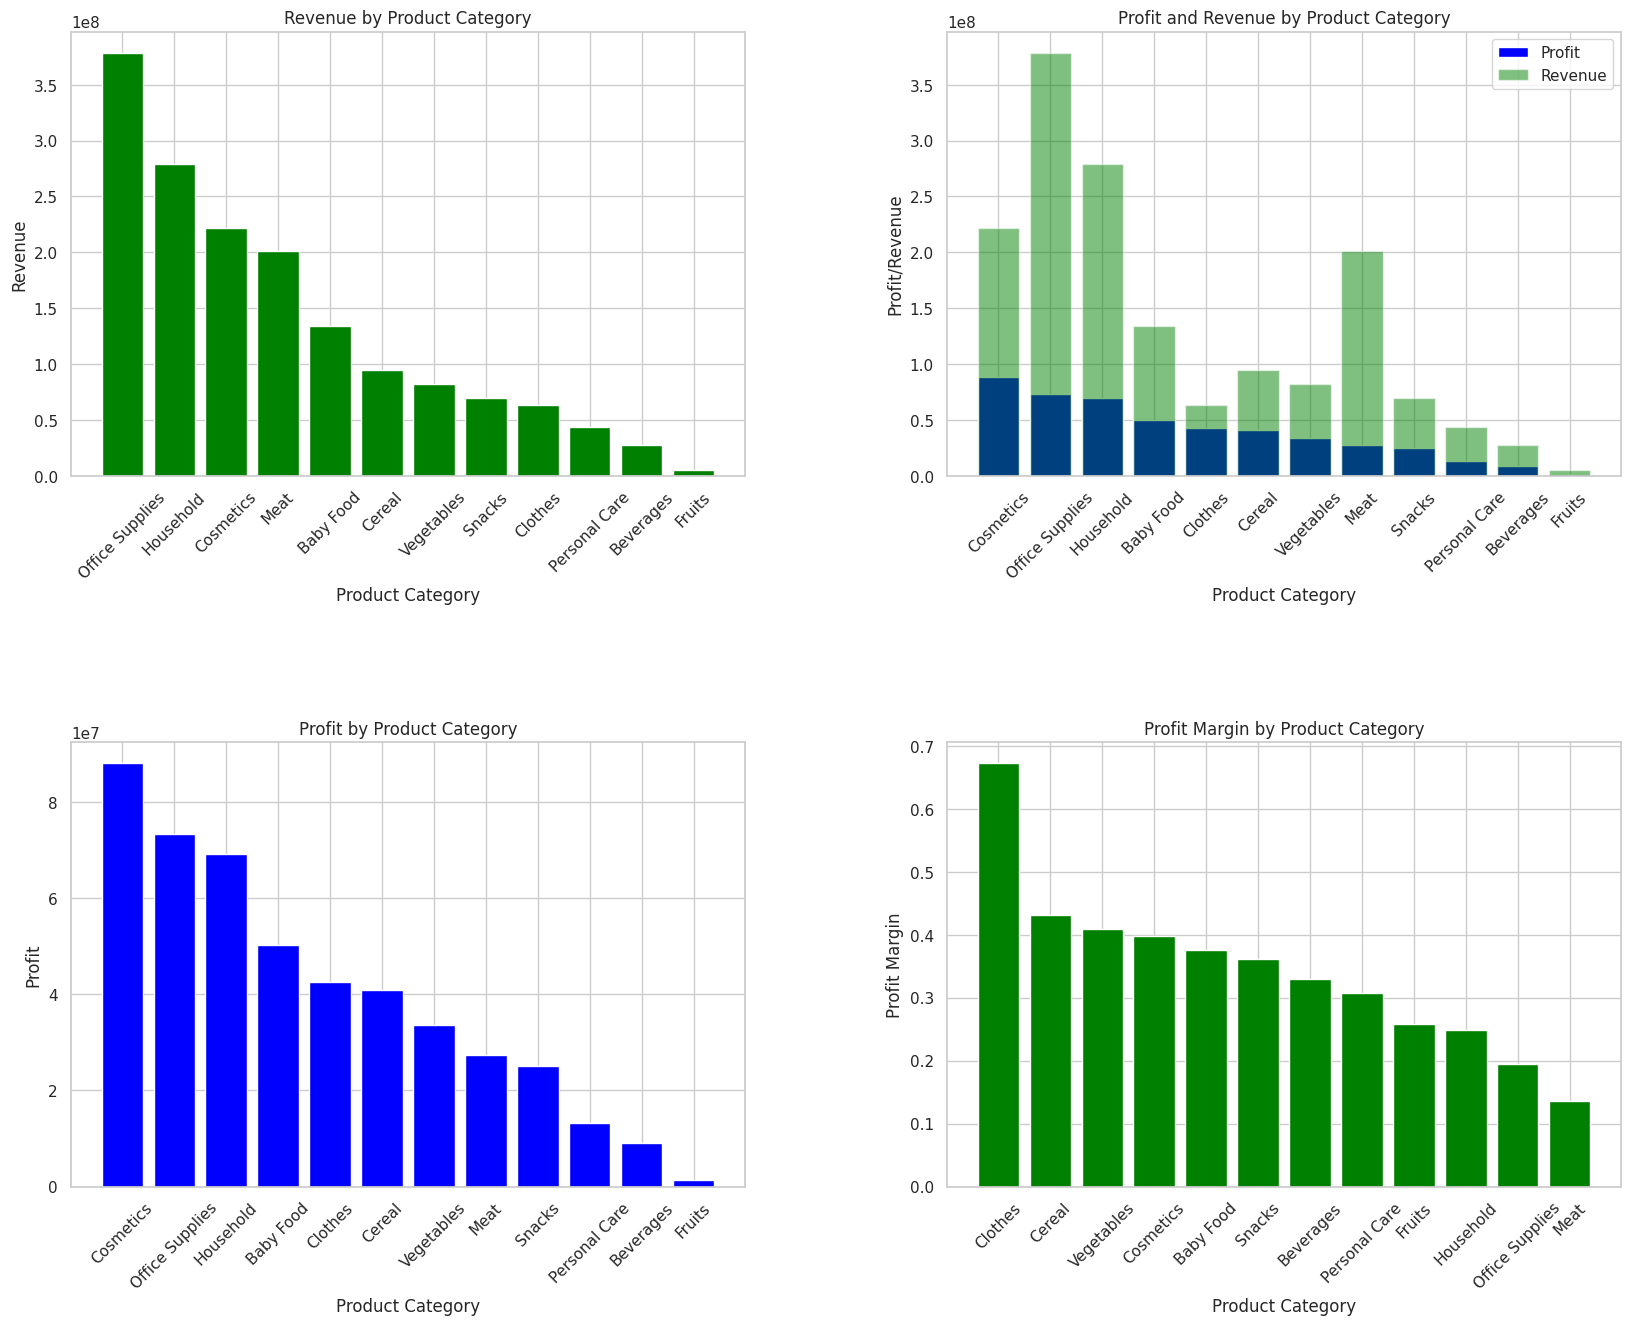

In [ ]:
# Built dashbord

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

# First subplot

revenue_by_category = merged_df2.groupby('item_type')['Revenue'].sum().sort_values(ascending=False)
ax[0, 0].bar(revenue_by_category.index, revenue_by_category.values, color='green')
ax[0, 0].set_title('Revenue by Product Category')
ax[0, 0].set_xlabel('Product Category')
ax[0, 0].set_ylabel('Revenue')
ax[0, 0].tick_params(axis='x', rotation=45)

# Second subplot
ax[1, 0].bar(profit_by_category.index, profit_by_category.values, color='blue')
ax[1, 0].set_title('Profit by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Profit')
ax[1, 0].tick_params(axis='x', rotation=45)

# Third subplot

profit_and_revenue_by_category = pd.DataFrame({'Profit': profit_by_category, 'Revenue': revenue_by_category})

profit_and_revenue_by_category = profit_and_revenue_by_category.sort_values(by='Profit', ascending=False)


ax[0, 1].bar(profit_and_revenue_by_category.index, profit_and_revenue_by_category['Profit'], color='blue', label='Profit')
ax[0, 1].bar(profit_and_revenue_by_category.index, profit_and_revenue_by_category['Revenue'], color='green', label='Revenue', alpha=0.5)
ax[0, 1].set_title('Profit and Revenue by Product Category')
ax[0, 1].set_xlabel('Product Category')
ax[0, 1].set_ylabel('Profit/Revenue')
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].legend()




# Fours subplot

profit_margin_by_category = profitability_by_category.sort_values(ascending=False)
ax[1, 1].bar(profit_margin_by_category.index, profit_margin_by_category.values, color='green')
ax[1, 1].set_title('Profit Margin by Product Category')
ax[1, 1].set_xlabel('Product Category')
ax[1, 1].set_ylabel('Profit Margin')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.show()

Conclusion:

Total orders: 1,248\
Total countries covered: 45\
Average order check: 1,283,293.5\
Total profit: 473,709,035\
Total revenue: 1,598,983,761.2

The revenue from online and offline sales is nearly equal: 49.34% vs. 50.65%, respectively.\
94% of the revenue comes from sales in Europe, while only about 6% comes from Asia.\
Shipping speed and the day of the week do not affect revenue.\
Cosmetics generated the highest profit, despite being only the third in revenue, so special attention should be given to this category.\
Additionally, the Clothes, Cereal, Vegetables, and Baby Food categories, despite having relatively low revenue, delivered a good profit.\
The Meat category generated relatively low profit considering its revenue.




